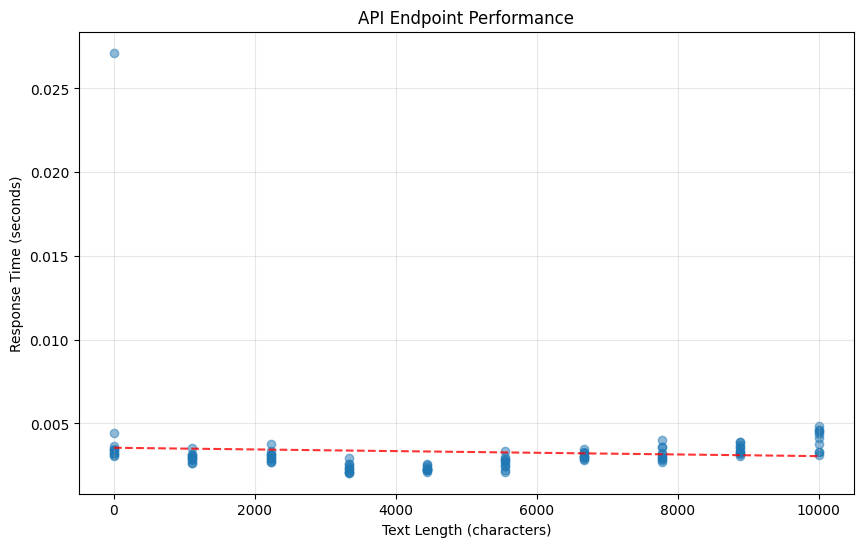

In [1]:
import requests
import random
import string
import time
import matplotlib.pyplot as plt
import argparse
import numpy as np

def generate_random_text(length):
    return ''.join(random.choices(string.ascii_letters + string.digits + ' ', k=length))

def measure_request_time(text, url):
    start_time = time.time()
    response = requests.post(url, json={"text": text})
    end_time = time.time()
    return end_time - start_time

def run_benchmark(url, num_tries, max_chars):
    results = []
    
    # Generate different text lengths
    lengths = np.linspace(1, max_chars, 10, dtype=int)
    
    for length in lengths:
        times = []
        for _ in range(num_tries):
            text = generate_random_text(length)
            time_taken = measure_request_time(text, url)
            times.append((length, time_taken))
        results.extend(times)
    
    return results

def plot_results(results):
    lengths = [r[0] for r in results]
    times = [r[1] for r in results]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(lengths, times, alpha=0.5)
    plt.xlabel('Text Length (characters)')
    plt.ylabel('Response Time (seconds)')
    plt.title('API Endpoint Performance')
    
    # Add trend line
    z = np.polyfit(lengths, times, 1)
    p = np.poly1d(z)
    plt.plot(lengths, p(lengths), "r--", alpha=0.8)
    
    plt.grid(True, alpha=0.3)
    plt.show()

url = "http://localhost:11434/api/embed"
tries = 10
max_chars = 10000

results = run_benchmark(url, tries, max_chars)
plot_results(results)